# Calculate sun azimuth and elevation
Input
* **Date**
* **Utc**
* **longitude** [&#176;] negative values to east, positive to west 
* **latitude** [&#176;] negative values to south, positive to north

Output
* **azimuth** [&#176;] negative values to east, positive to west
* **elevaion** [&#176;] negative values to south, positive to north

In [24]:
import math;
import datetime;
def sonnen_hoehenwinkel(date, utc, longitude, latitude):
    """
    -- Eingaben
    -- C3: Datum
    -- C4: UTC
    -- C5: geo. Länge
    -- C6: geo. Breite
    -- D6: =C6*PI()/180
    D6=0.840492448
    """
    C4=(utc.hour*3600 + utc.minute*60 + utc.second)/86400
    C5=longitude
    C6=latitude
    D6=math.radians(C6)

    """
    -- Deklination
    -- C8: n=C3-DATUM(JAHR(C3);1;1)
    -- C9: delta = =23,45*SIN(2*PI()*(284+C8)/365)
    -- D9: =C9*PI()/180
    D9=0.223155848
    """
    C8=date-datetime.date(date.year, 1, 1)
    C9=23.45*math.sin(2*math.pi*(284+C8.days)/365)
    D9=math.radians(C9)
    
    """
    -- Zeitgleichung
    -- C11: Tageswinkel=C8/365*2*PI()
    -- C12: Zeitgleichung =229,18312*(0,000075+0,001868*COS(C11)-0,032077*SIN(C11)-0,014615*COS(2*C11)-0,04089*SIN(2*C11))
    C12=-4.04796646
    """
    C11=C8.days/365*2*math.pi
    C12=229.18312*(0.000075+0.001868*math.cos(C11)-0.032077*math.sin(C11)-0.014615*math.cos(2*C11)-0.04089*math.sin(2*C11))
    
    """
    -- Wahre Uhrzeit
    -- C14: WOZ=C4*24+C5/15+C12/60
    -- C15: Azimuth=(C14-12)/12*PI()
    -- C16: Azimuth in Grad=180/PI()*C15
    C14=17.86734323
    """
    C14=C4*24+C5/15+C12/60
    C15=(C14-12)/12*math.pi
    C16=math.degrees(C15)

    """
    -- Sonnenhöhe
    -- C18: sin Sonnehöhe=SIN(D6)*SIN(D9)+COS(D6)*COS(D9)*COS(C15)
    -- C19: Sonnenhöhe=ARCSIN(C18)*180/PI()
    C18 = 0.187457309;
    """
    C18 = math.sin(D6)*math.sin(D9)+math.cos(D6)*math.cos(D9)*math.cos(C15);
    C19 = math.degrees(math.asin(C18))
    return C16, C19

### Reference data

In [25]:
# GPS Koordinaten (Wels)
#[longitude=14.02214, latitude=48.15677]
gps = [14.02214, 48.15677]
date=datetime.date(2020, 8, 18)
utc=datetime.time(17, 0, 0)

In [26]:
print(sonnen_hoehenwinkel(date, utc, gps[0], gps[1]))

(88.01014838488402, 10.804445151503108)


Expected result: **(88.01014838488402, 10.804445151503108)**

## Sun track at season start
Calcutes and plots the sun track at season start
* spring Mar 23rd
* summer Jun 21st
* autumn Sep 23rd
* winter Dec 21st

On each day the position from 4 am to 20 pm is calculated.

In [27]:
import matplotlib.pyplot as plt

def plot_oneday(oneday):
    # plt.set(xlabel='time (s)', ylabel='voltage (mV)', title='About as simple as it gets, folks')
    plt.title='About as simple as it gets, folks'
    plt.xlabel='azimuth (deg)'
    plt.ylabel='elevation (deg)'
    plt.plot(*map(list, zip(*oneday)), 'ko-')
    plt.grid()
    plt.show()
    
def plot_day(date):
    oneday = []
    for x in range(3, 20):
        utc = datetime.time(x, 0, 0)
        oneday.append(sonnen_hoehenwinkel(date, utc, gps[0], gps[1]))
    # print(oneday)
    ret = oneday;
    plot_oneday(oneday)
    return ret

### Spring

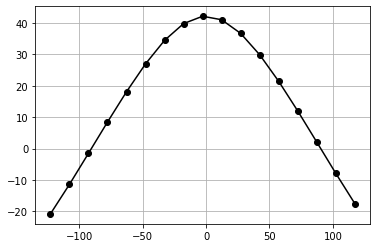

In [28]:
mar23rd = datetime.date(2020, 3, 23)
spring = plot_day(mar23rd)

### Summer

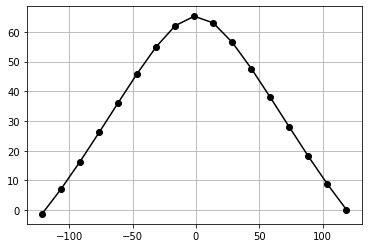

In [29]:
jun21st = datetime.date(2020, 6, 21)
summer = plot_day(jun21st)

### Autumn

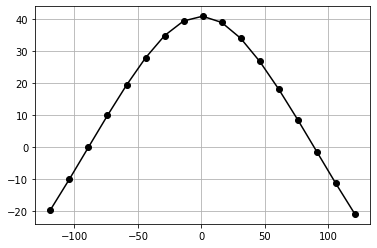

In [30]:
sep23rd = datetime.date(2020, 9, 23)
autumn = plot_day(sep23rd)

### Winter

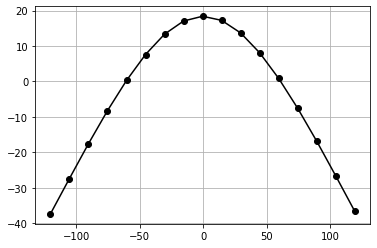

In [31]:
dec21st = datetime.date(2020, 12, 21)
winter = plot_day(dec21st)

### All seasons

In [32]:
def plot_seasons():
    data = spring; plt.plot(*map(list, zip(*data)), 'go-')
    data = summer; plt.plot(*map(list, zip(*data)), 'ro-')
    data = autumn; plt.plot(*map(list, zip(*data)), 'ko-')
    data = winter; plt.plot(*map(list, zip(*data)), 'bo-')
    plt.grid()

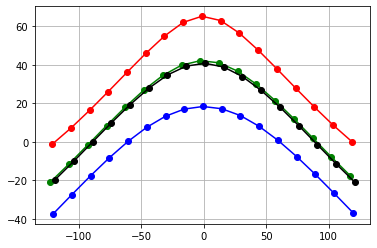

In [33]:
plot_seasons()

## Sun track at hour over year
Calculates the sun track at a specific time overthe year
* 6 am
* 9 am
* 12 am
* 3 pm
* 6 pm

Each month we calculate the sun position at 1st and 15th.

In [34]:
import matplotlib.pyplot as plt

def plot_onehour(onehour):
    data = onehour; plt.plot(*map(list, zip(*data)), 'ko-')
    # plt.set(xlabel='time (s)', ylabel='voltage (mV)', title='About as simple as it gets, folks')
    plt.title='About as simple as it gets, folks'
    plt.xlabel='azimuth (deg)'
    plt.ylabel='elevation (deg)'
    plt.grid()
    plt.show()
    
def plot_hour(utc):
    onehour = []
    for x in range(1, 13):
        date = datetime.date(2020, x, 1)
        onehour.append(sonnen_hoehenwinkel(date, utc, gps[0], gps[1]))
        date = datetime.date(2020, x, 15)
        onehour.append(sonnen_hoehenwinkel(date, utc, gps[0], gps[1]))
    # print(onehour)
    plot_onehour(onehour)
    return onehour

### 6 am

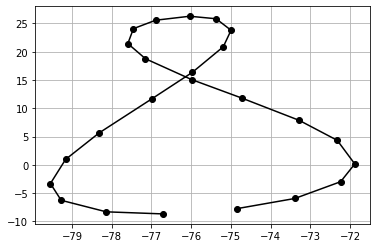

In [35]:
am6 = plot_hour(datetime.time(6, 0, 0))

### 9 am

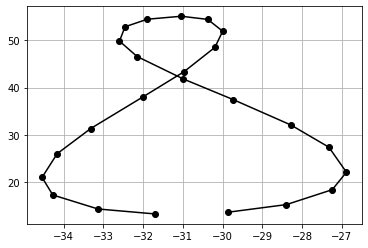

In [36]:
am9 = plot_hour(datetime.time(9, 0, 0))

### 12 am

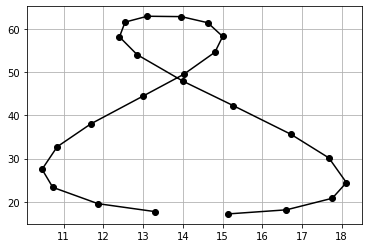

In [37]:
am12 = plot_hour(datetime.time(12, 0, 0))

### 3 pm

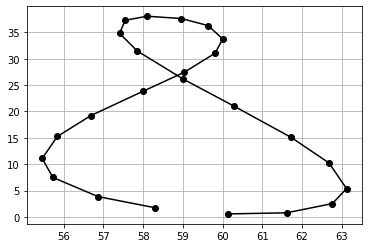

In [38]:
 pm3 = plot_hour(datetime.time(15, 0, 0))

### 6 pm

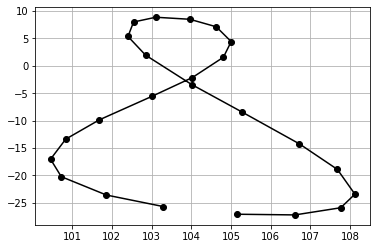

In [39]:
pm6 = plot_hour(datetime.time(18, 0, 0))

### All hours

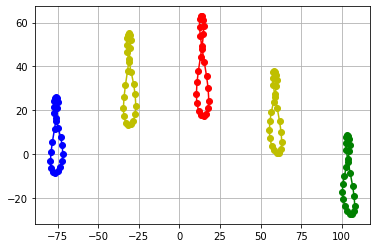

In [40]:
data = am6; plt.plot(*map(list, zip(*data)), 'bo-')
data = am9; plt.plot(*map(list, zip(*data)), 'yo-')
data = am12; plt.plot(*map(list, zip(*data)), 'ro-')
data = pm3; plt.plot(*map(list, zip(*data)), 'yo-')
data = pm6; plt.plot(*map(list, zip(*data)), 'go-')
plt.grid()

**End**